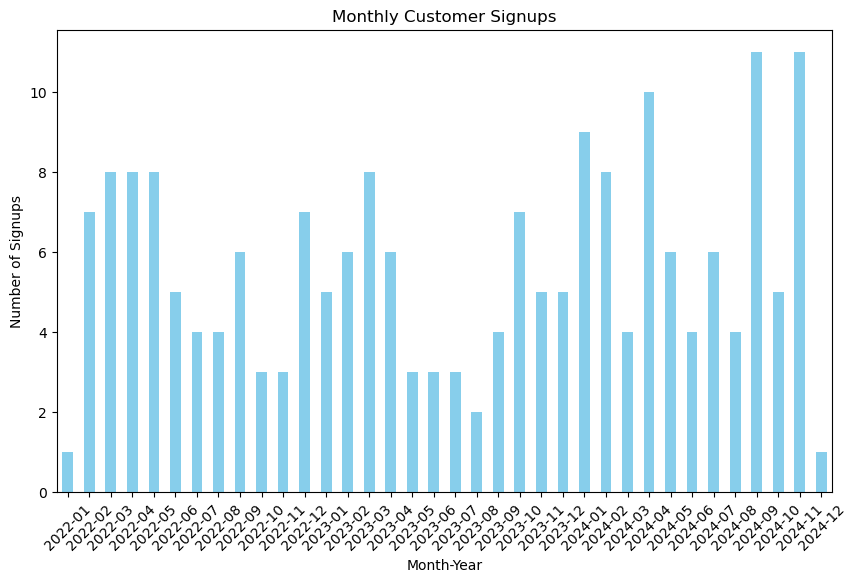

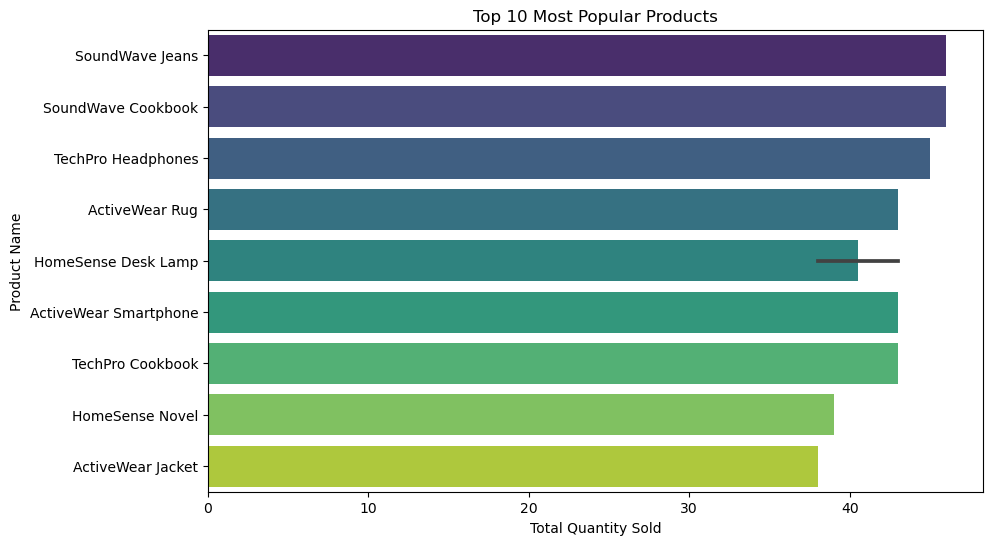

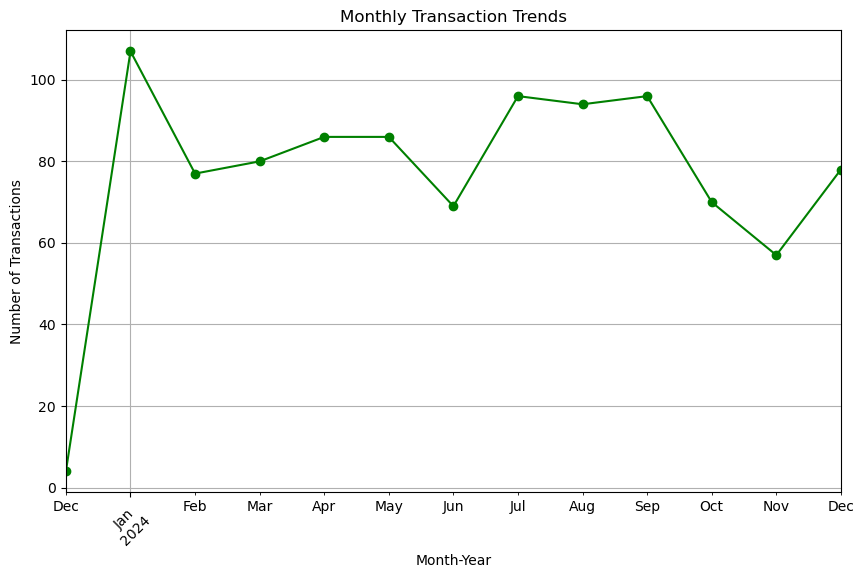

NameError: name 'perform_clustering' is not defined

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

# Load datasets
customers = pd.read_csv(r"C:\Users\dhanu\Downloads\Customers.csv")
products = pd.read_csv(r"C:\Users\dhanu\Downloads\Products.csv")
transactions = pd.read_csv(r"C:\Users\dhanu\Downloads\Transactions.csv")

# Convert dates to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# --- Task 1: EDA --- #

# 1. Customer signup trends
def plot_signup_trends():
    plt.figure(figsize=(10, 6))
    customers['SignupDate'].dt.to_period('M').value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title('Monthly Customer Signups')
    plt.xlabel('Month-Year')
    plt.ylabel('Number of Signups')
    plt.xticks(rotation=45)
    plt.show()

# 2. Popular products
def plot_popular_products():
    product_sales = transactions.groupby('ProductID').agg({'Quantity': 'sum'}).reset_index()
    popular_products = pd.merge(product_sales, products, on='ProductID')
    popular_products = popular_products.sort_values('Quantity', ascending=False).head(10)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=popular_products, x='Quantity', y='ProductName', palette='viridis')
    plt.title('Top 10 Most Popular Products')
    plt.xlabel('Total Quantity Sold')
    plt.ylabel('Product Name')
    plt.show()

# 3. Transaction trends
def plot_transaction_trends():
    monthly_transactions = transactions['TransactionDate'].dt.to_period('M').value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    monthly_transactions.plot(kind='line', marker='o', color='green')
    
    plt.title('Monthly Transaction Trends')
    plt.xlabel('Month-Year')
    plt.ylabel('Number of Transactions')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()



# Execute EDA plots
plot_signup_trends()
plot_popular_products()
plot_transaction_trends()